### Process outline

1. Preprocess the data such as highly-variable gene filtering

See https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html for preprocessing

Use dandelion/dandelion/preprocessing/external/_preprocessing.py/recipe_scannpy_qc function to do preprocessing

2. Integration with Scanorama

See https://github.com/brianhie/scanorama for more info

See https://uci-genpals.github.io/integration/2020/12/03/scanorama_demo_pancreas.html for tutorial

In [1]:
# Environment set-up
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as anndata
import scipy as scipy
import seaborn as sbn
import matplotlib.pyplot as plt
from dandelion.preprocessing.external._preprocessing import recipe_scanpy_qc

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load all AnnData objects into a list

from pathlib import Path
from itertools import chain

GSE132509_directory = Path('/QRISdata/Q6104/Xiaohan/2_AnnData_objs/GSE132509')
GSE236351_directory = Path('/QRISdata/Q6104/Xiaohan/2_AnnData_objs/GSE236351')
GSE148218_directory = Path('/QRISdata/Q6104/Xiaohan/2_AnnData_objs/GSE148218')

combined_dirs = chain(GSE132509_directory.iterdir(), GSE236351_directory.iterdir(), GSE148218_directory.iterdir())
adatas = []
for adata_path in combined_dirs:
    if "_uni.h5ad" in adata_path.name:
        adata = anndata.read_h5ad(adata_path)
        adatas.append(adata)

print(len(adatas))
print(adatas[0])

26
AnnData object with n_obs × n_vars = 2229 × 33694
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode'
    var: 'gene_ids'


In [3]:
# Find out common genes among all AnnData objects
common_genes = set(adatas[0].var_names)
for adata in adatas[1:]:
    common_genes.intersection_update(adata.var_names)
    print(len(common_genes))

33694
33694
33694
33694
33694
33694
33694
33694
33694
33694
14889
14718
14718
14718
14718
14718
14718
14071
14071
14071
14071
14071
14071
14071
14071


In [4]:
# Filter all AnnData objects with common genes
adatas_common_genes = []
for adata in adatas:
    adata_common_genes = adata[:, list(common_genes)]
    print(adata_common_genes.shape)
    adatas_common_genes.append(adata_common_genes)

(2229, 14071)
(1612, 14071)
(2748, 14071)
(3105, 14071)
(5069, 14071)
(3728, 14071)
(5013, 14071)
(6274, 14071)
(2776, 14071)
(2959, 14071)
(3862, 14071)
(1712, 14071)
(6916, 14071)
(6523, 14071)
(3731, 14071)
(3726, 14071)
(2942, 14071)
(4293, 14071)
(6123, 14071)
(4163, 14071)
(7826, 14071)
(7917, 14071)
(7160, 14071)
(4224, 14071)
(6106, 14071)
(7228, 14071)


### <span style="color:yellow">**Attempt 2:**</span> concatenate all AnnData objects and find highly variable genes together

In [5]:
# Do the preprocessing

adatas_filtered = [] 

for adata in adatas_common_genes:
    adata.raw = adata
    print(adata.shape)

    # Do QC and filtering
    recipe_scanpy_qc(adata)
    adata = adata[adata.obs.filter_rna == 'False', :]
    print(adata.shape)

    # Do normalization
    sc.pp.normalize_total(adata, target_sum=1.0)

    # Do the log transformation
    sc.pp.log1p(adata)

    adatas_filtered.append(adata)

(2229, 14071)
(1764, 14071)
(1612, 14071)
(1243, 14071)
(2748, 14071)
(1087, 14071)
(3105, 14071)
(2181, 14071)
(5069, 14071)
(3578, 14071)
(3728, 14071)
(3245, 14071)
(5013, 14071)
(2341, 14071)
(6274, 14071)
(4217, 14071)
(2776, 14071)
(2490, 14071)
(2959, 14071)
(2506, 14071)
(3862, 14071)
(1193, 14071)
(1712, 14071)
(1267, 14071)
(6916, 14071)
(6513, 14071)
(6523, 14071)
(5457, 14071)
(3731, 14071)
(3460, 14071)
(3726, 14071)
(2549, 14071)
(2942, 14071)
(2460, 14071)
(4293, 14071)
(4036, 14071)
(6123, 14071)
(680, 14071)
(4163, 14071)
(3266, 14071)
(7826, 14071)
(6321, 14071)
(7917, 14071)
(5506, 14071)
(7160, 14071)
(5701, 14071)
(4224, 14071)
(2793, 14071)
(6106, 14071)
(4268, 14071)
(7228, 14071)
(5469, 14071)


In [6]:
# Concatenate filtered AnnData objects into one to select highly variable genes
adatas_filtered_all = sc.AnnData.concatenate(*adatas_filtered)

target_genes = 5000
sc.pp.highly_variable_genes(adatas_filtered_all, n_top_genes=target_genes, batch_key='dataset')
adatas_filtered_all

AnnData object with n_obs × n_vars = 85591 × 14071
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-21', 'feature_types-21', 'gene_ids-22', 'feature_types-22', 'gene_ids-23', 'feature_types-23', 'gene_ids-24', 'feature_types-24', 'gene_ids-25', 'feature_types-25', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'highly_variable', 'means', 'di

In [7]:
adatas_filtered_all.var

,gene_ids-0,gene_ids-1,gene_ids-10,gene_ids-11,feature_types-11,gene_ids-12,feature_types-12,gene_ids-13,feature_types-13,gene_ids-14,...,gene_ids-6,gene_ids-7,gene_ids-8,gene_ids-9,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
STOX1,ENSG00000165730,ENSG00000165730,ENSG00000165730,STOX1,Gene Expression,ENSG00000165730,Gene Expression,ENSG00000165730,Gene Expression,STOX1,...,ENSG00000165730,ENSG00000165730,ENSG00000165730,ENSG00000165730,False,1.649284e-06,-8.242614,-0.490932,0,False
CCL7,ENSG00000108688,ENSG00000108688,ENSG00000108688,CCL7,Gene Expression,ENSG00000108688,Gene Expression,ENSG00000108688,Gene Expression,CCL7,...,ENSG00000108688,ENSG00000108688,ENSG00000108688,ENSG00000108688,False,7.244463e-09,-2.859822,-0.518231,0,False
PHACTR2,ENSG00000112419,ENSG00000112419,ENSG00000112419,PHACTR2,Gene Expression,ENSG00000112419,Gene Expression,ENSG00000112419,Gene Expression,PHACTR2,...,ENSG00000112419,ENSG00000112419,ENSG00000112419,ENSG00000112419,True,1.173806e-05,-7.811005,0.716894,3,True
CREB3L4,ENSG00000143578,ENSG00000143578,ENSG00000143578,CREB3L4,Gene Expression,ENSG00000143578,Gene Expression,ENSG00000143578,Gene Expression,CREB3L4,...,ENSG00000143578,ENSG00000143578,ENSG00000143578,ENSG00000143578,False,1.877711e-05,-8.151282,-0.225363,0,False
BAZ2B,ENSG00000123636,ENSG00000123636,ENSG00000123636,BAZ2B,Gene Expression,ENSG00000123636,Gene Expression,ENSG00000123636,Gene Expression,BAZ2B,...,ENSG00000123636,ENSG00000123636,ENSG00000123636,ENSG00000123636,True,4.825967e-05,-7.985287,0.224419,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NEDD8,ENSG00000129559,ENSG00000129559,ENSG00000129559,NEDD8,Gene Expression,ENSG00000129559,Gene Expression,ENSG00000129559,Gene Expression,NEDD8,...,ENSG00000129559,ENSG00000129559,ENSG00000129559,ENSG00000129559,False,2.468906e-04,-8.124982,-0.152055,1,False
TXNL1,ENSG00000091164,ENSG00000091164,ENSG00000091164,TXNL1,Gene Expression,ENSG00000091164,Gene Expression,ENSG00000091164,Gene Expression,TXNL1,...,ENSG00000091164,ENSG00000091164,ENSG00000091164,ENSG00000091164,False,8.915461e-05,-8.281980,-0.601327,0,False
LINC00265,ENSG00000188185,ENSG00000188185,ENSG00000188185,LINC00265,Gene Expression,ENSG00000188185,Gene Expression,ENSG00000188185,Gene Expression,LINC00265,...,ENSG00000188185,ENSG00000188185,ENSG00000188185,ENSG00000188185,False,9.211689e-07,-8.186152,-0.328952,0,False
FIS1,ENSG00000214253,ENSG00000214253,ENSG00000214253,FIS1,Gene Expression,ENSG00000214253,Gene Expression,ENSG00000214253,Gene Expression,FIS1,...,ENSG00000214253,ENSG00000214253,ENSG00000214253,ENSG00000214253,False,1.396866e-04,-8.163599,-0.261670,0,False


In [8]:
# As we don't have enough target genes, we need to consider the 'next best' HVGs
n_batches = len(adatas_filtered_all.obs['dataset'].cat.categories)

# These are the genes that are variable across all batches
nbatch1_dispersions = adatas_filtered_all.var['dispersions_norm'][adatas_filtered_all.var.highly_variable_nbatches > n_batches - 1]
nbatch1_dispersions.sort_values(ascending=False, inplace=True)
print(len(nbatch1_dispersions))

2007


In [9]:
# Fill up the genes now, using this method from the Theis lab
enough = False
hvg = nbatch1_dispersions.index[:]
not_n_batches = 1

# We'll go down one by one, until we're selecting HVGs from just a single batch.
while not enough:

    target_genes_diff = target_genes - len(hvg) # Get the number of genes we still need to fill up

    tmp_dispersions = adatas_filtered_all.var['dispersions_norm'][adatas_filtered_all.var.highly_variable_nbatches == (n_batches - not_n_batches)]

    # If we haven't hit the target gene numbers, add this to the list and we repeat this iteration
    if len(tmp_dispersions) < target_genes_diff:

        hvg = hvg.append(tmp_dispersions.index)
        not_n_batches += 1

    else:

        tmp_dispersions.sort_values(ascending=False, inplace=True)
        hvg = hvg.append(tmp_dispersions.index[:target_genes_diff])
        enough = True

In [10]:
# Subset the meta AnnData object on the highly variable genes
adatas_filtered_hvg_all = adatas_filtered_all[:, hvg]

In [20]:
# Visualize the data before integration
sc.tl.pca(adatas_filtered_hvg_all) # Calculate the PCA embeddings
sc.pp.neighbors(adatas_filtered_hvg_all) # Determine the kNN graph
sc.tl.umap(adatas_filtered_hvg_all) # Calculate the UMAP

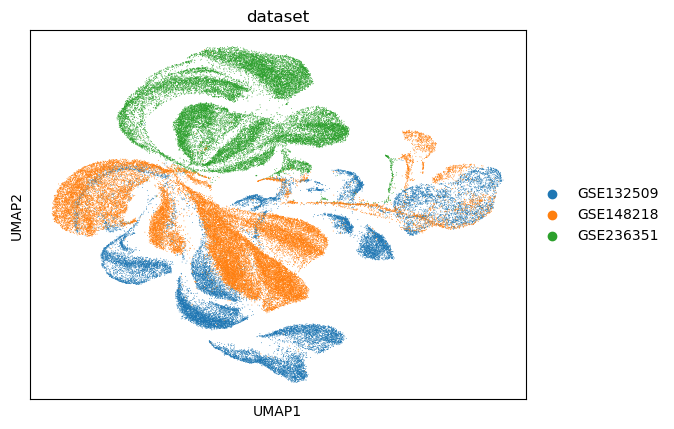

In [21]:
sc.pl.umap(adatas_filtered_hvg_all, color=['dataset'])

In [22]:
# Split the meta AnnData
adatas_filtered_hvg = []

for batch in adatas_filtered_hvg_all.obs['batch'].unique():
    adatas_filtered_hvg.append(adatas_filtered_hvg_all[adatas_filtered_hvg_all.obs['batch']==batch].copy())

print(len(adatas_filtered_hvg))
print(adatas_filtered_hvg[0])

26
AnnData object with n_obs × n_vars = 249 × 5000
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-21', 'feature_types-21', 'gene_ids-22', 'feature_types-22', 'gene_ids-23', 'feature_types-23', 'gene_ids-24', 'feature_types-24', 'gene_ids-25', 'feature_types-25', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'highly_variable', 'means', 'di

In [23]:
# Now we run Scanorama on the split data.
import scanorama

corrected = scanorama.correct_scanpy(adatas_filtered_hvg, return_dimred=True)

# Concatenate the integrated AnnData objects
adata_integrated = sc.AnnData.concatenate(*corrected)
print(adata_integrated)

Found 5000 genes among all datasets
[[0.00000000e+00 5.86345382e-01 5.74297189e-01 1.60642570e-01
  1.84738956e-01 4.01606426e-02 3.21285141e-02 3.73493976e-01
  5.22088353e-02 6.02409639e-02 2.08835341e-01 4.01606426e-02
  4.01606426e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.60642570e-02 0.00000000e+00 1.32743363e-02 4.01606426e-03
  4.01606426e-02 1.16465863e-01 8.43373494e-02 7.22891566e-02
  6.42570281e-02 2.81124498e-02]
 [0.00000000e+00 0.00000000e+00 2.42156074e-01 7.07964602e-02
  2.39167136e-02 1.84231698e-01 3.37892196e-02 3.94207562e-02
  5.63153660e-02 9.65406275e-02 1.47299509e-02 3.23599053e-02
  3.21802092e-03 3.21802092e-03 1.60901046e-03 0.00000000e+00
  3.29268293e-02 2.41351569e-03 1.76991150e-02 6.75784393e-02
  8.84955752e-02 2.55832663e-01 6.03378922e-02 6.91874497e-02
  5.95333870e-02 6.43604183e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.64415863e-02
  3.82667417e-02 3.21543408e-02 9.64630225e-03 3.53697749e-02
  2.25080386e-02 6.83815648e-0

In [24]:
# Do the UMAP to visualize the integration results
sc.pp.neighbors(adata_integrated, use_rep='X_scanorama')
sc.tl.umap(adata_integrated)

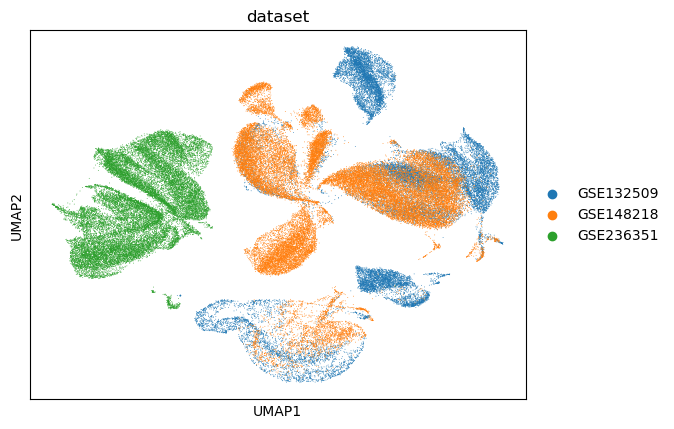

In [25]:
sc.pl.umap(adata_integrated, color=['dataset'])

### <span style="color:yellow">**Attempt 3:**</span> concatenate all AnnData objects and find highly variable genes together and scale individually

In [11]:
# The preprocessing is the same as Attempt 2,
# but before integration, we scale the gene expression of the meta AnnData

sc.pp.scale(adatas_filtered_hvg_all, max_value=10)

# Visualize the data before integration
sc.tl.pca(adatas_filtered_hvg_all) # Calculate the PCA embeddings
sc.pp.neighbors(adatas_filtered_hvg_all) # Determine the kNN graph
sc.tl.umap(adatas_filtered_hvg_all) # Calculate the UMAP

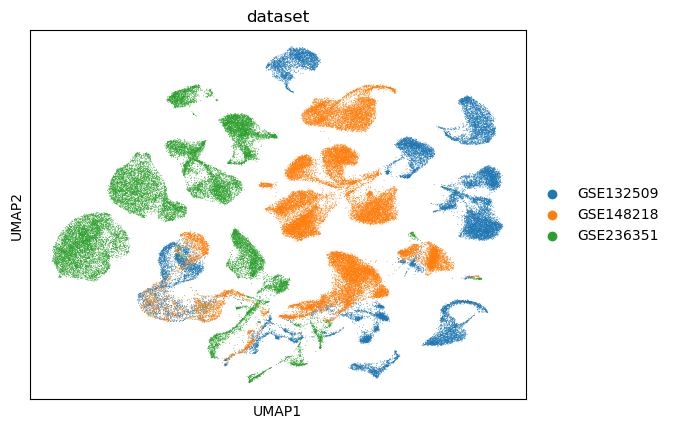

In [27]:
sc.pl.umap(adatas_filtered_hvg_all, color=['dataset'])

In [12]:
# Split the meta AnnData
adatas_filtered_hvg_scaled = []

for batch in adatas_filtered_hvg_all.obs['batch'].unique():
    adatas_filtered_hvg_scaled.append(adatas_filtered_hvg_all[adatas_filtered_hvg_all.obs['batch']==batch].copy())

print(len(adatas_filtered_hvg_scaled))
print(adatas_filtered_hvg_scaled[0])

26
AnnData object with n_obs × n_vars = 1764 × 5000
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'scrublet_score', 'is_doublet', 'filter_rna', 'batch'
    var: 'gene_ids-0', 'gene_ids-1', 'gene_ids-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-21', 'feature_types-21', 'gene_ids-22', 'feature_types-22', 'gene_ids-23', 'feature_types-23', 'gene_ids-24', 'feature_types-24', 'gene_ids-25', 'feature_types-25', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'gene_ids-8', 'gene_ids-9', 'highly_variable', 'means', 'd

In [13]:
# Now we run Scanorama on the split data.
import scanorama

corrected = scanorama.correct_scanpy(adatas_filtered_hvg_scaled, return_dimred=True)

# Concatenate the integrated AnnData objects
adata_integrated_scaled = sc.AnnData.concatenate(*corrected)
print(adata_integrated_scaled)

Found 5000 genes among all datasets
[[0.00000000e+00 6.06596943e-01 1.60997732e-01 5.09070295e-01
  2.21655329e-01 6.34920635e-02 1.92743764e-02 1.92176871e-01
  1.19047619e-02 2.04081633e-02 1.40821459e-01 2.92028414e-02
  0.00000000e+00 0.00000000e+00 4.53514739e-03 0.00000000e+00
  4.53514739e-03 0.00000000e+00 7.64705882e-02 1.64399093e-02
  3.40136054e-02 3.74149660e-02 3.68480726e-02 3.58037952e-03
  2.43764172e-02 3.06122449e-02]
 [0.00000000e+00 0.00000000e+00 1.38374899e-01 2.46983105e-01
  1.28720837e-02 2.69509252e-01 8.84955752e-03 1.60901046e-03
  1.12630732e-02 1.20675784e-02 8.38222967e-04 2.01126307e-02
  8.04505229e-04 3.21802092e-03 1.60901046e-03 8.04505229e-04
  1.28720837e-02 0.00000000e+00 5.00000000e-02 1.20675784e-02
  3.45937249e-02 5.71198713e-02 3.13757039e-02 8.04505229e-03
  3.62027353e-02 4.82703138e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.91471802e-02
  1.01195952e-02 2.57589696e-02 1.10395584e-02 2.11591536e-02
  8.27966881e-03 3.52345906e-0

In [14]:
# Do the UMAP to visualize the integration results
sc.pp.neighbors(adata_integrated_scaled, use_rep='X_scanorama')
sc.tl.umap(adata_integrated_scaled)

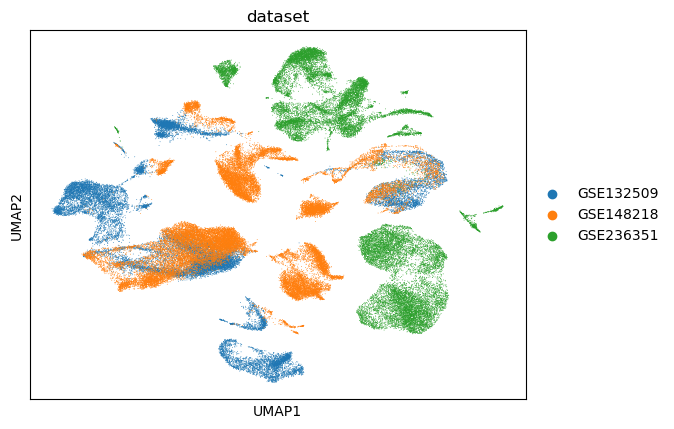

In [15]:
sc.pl.umap(adata_integrated_scaled, color=['dataset'])